In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


In [2]:
import matplotlib.style as style
# style.use('fivethirtyeight')
# style.use('tableau-colorblind10')
plt.style.use("markerr.mplstyle")

In [3]:
# https://stackoverflow.com/questions/33061785/can-i-load-google-fonts-with-matplotlib-and-jupyter

In [4]:
# grid.linestyle: :
# colors5 = ['#5383ad','#7BA0C0','#a3bdd3','#cbd9e6','#f3f6f9']
colors5 = ['#528abb','#74a1ca','#96b7d6','#b8d1e5','#dbe8f1']
colors2 = ['#274456','#7BA0C0']
white = ['#ffffff']
greys = ['#B3B6BA']
blacks = ['#212121']

In [5]:
# import matplotlib.font_manager

In [6]:
# df = pd.read_csv('Zip_Zri_MultiFamilyResidenceRental.csv')


In [7]:
zori = pd.read_csv('zori.csv')


In [8]:
zori.columns

Index(['RegionID', 'RegionName', 'SizeRank', 'MsaName', '2014-01', '2014-02',
       '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08',
       '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02',
       '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08',
       '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02',
       '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08',
       '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02',
       '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
       '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
       '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
       '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02',
       '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
       '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02',
       '2020-03', '2020-04', '2020-05', '2020-

In [9]:
zori_time = pd.melt(zori,
    id_vars=['RegionID', 'RegionName', 'SizeRank', 'MsaName'],
    value_vars=[
        '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06',
        '2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
        '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06',
        '2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
        '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06',
        '2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
        '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06',
        '2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
        '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06',
        '2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
        '2019-01','2019-02','2019-03','2019-04','2019-05','2019-06',
        '2019-07','2019-08','2019-09','2019-10','2019-11','2019-12',
        '2020-01','2020-02','2020-03','2020-04','2020-05','2020-06', 
        '2020-07','2020-08','2020-09','2020-10','2020-11','2020-12', 
        '2021-01','2021-02','2021-03','2021-04','2021-05','2021-06', 
        '2021-07'],
)

In [10]:
zori_time.MsaName.unique()

array(['New York, NY', 'Chicago, IL', 'Houston, TX', 'El Paso, TX',
       'San Francisco, CA', 'Nashville, TN',
       'Los Angeles-Long Beach-Anaheim, CA', 'San Antonio, TX',
       'Washington, DC', 'Charlotte, NC', 'Austin, TX', 'Atlanta, GA',
       'Dallas-Fort Worth, TX', 'St. Louis, MO', 'Seattle, WA',
       'Phoenix, AZ', 'Baltimore, MD', 'Miami-Fort Lauderdale, FL',
       'Virginia Beach, VA', 'Orlando, FL', 'Denver, CO',
       'Sacramento, CA', 'Cleveland, OH', 'Tucson, AZ',
       'Philadelphia, PA', 'Riverside, CA', 'Jacksonville, FL',
       'San Diego, CA', 'Raleigh, NC', 'Portland, OR', 'Fort Myers, FL',
       'Tampa, FL', 'Boston, MA', 'Stamford, CT', 'Cincinnati, OH',
       'Albuquerque, NM', 'Las Vegas, NV', 'Greensboro, NC', 'Tulsa, OK',
       'Columbia, SC', 'San Jose, CA', 'Durham, NC', 'Detroit, MI',
       'Richmond, VA', 'Charleston, SC', 'Birmingham, AL',
       'Fort Collins, CO', 'Greenville, SC', 'Kansas City, MO',
       'Bakersfield, CA', 'Augusta, 

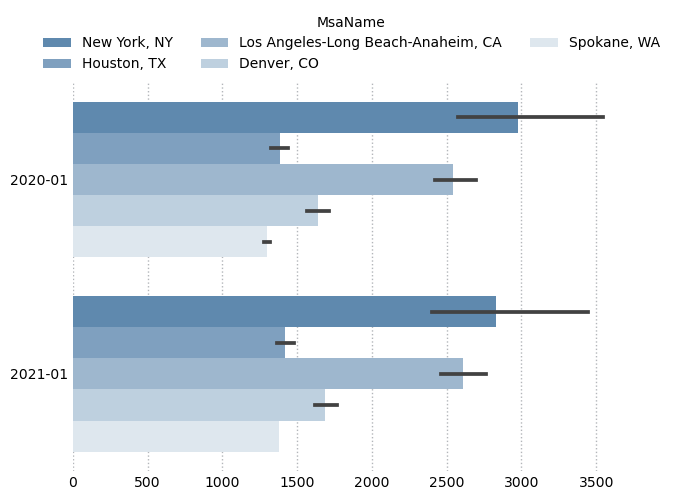

In [11]:
graph_df = zori_time[zori_time['MsaName'].isin(['Los Angeles-Long Beach-Anaheim, CA',
                                                'Spokane, WA',
                                                'Denver, CO',
                                                'New York, NY',
                                                'Houston, TX'])]
graph_df = graph_df[graph_df['variable'].isin(['2020-01','2021-01'])]


fig, ax = plt.subplots()

g = sns.barplot(data = graph_df, y = 'variable',x='value',hue='MsaName',ax=ax,palette=colors5)
g.set(xlabel='', ylabel='',title='')
sns.move_legend(g,loc='center', bbox_to_anchor=(.5, 1.1),frameon=False,ncol=3)
# g.get_xticklabels(fontweight = 'bold')
plt.show()

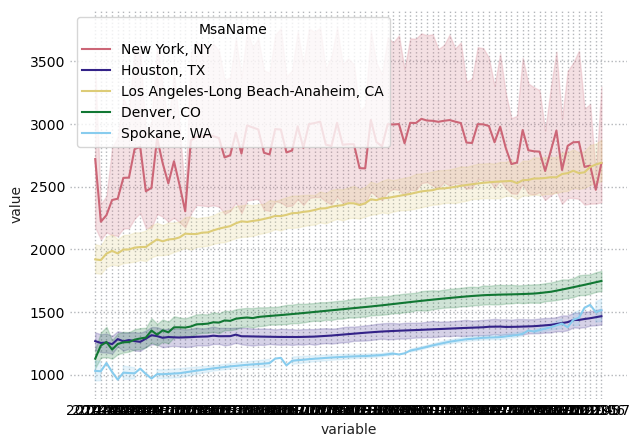

In [12]:
graph_df = zori_time[zori_time['MsaName'].isin(['Los Angeles-Long Beach-Anaheim, CA',
                                                'Spokane, WA',
                                                'Denver, CO',
                                                'New York, NY',
                                                'Houston, TX'])]
sns.lineplot(data = graph_df, x = 'variable',y='value',hue='MsaName')
plt.show()

In [16]:
zori_time.groupby(['MsaName','RegionName']).agg({'value':'std'}).sort_values('value',ascending=False)

value
MsaName                            RegionName             
New York, NY                       11963       2785.542421
                                   11937       2415.276436
                                   11968       2377.104245
Los Angeles-Long Beach-Anaheim, CA 90265       1452.721110
                                   90272        701.653915
...                                                    ...
Houston, TX                        77098         22.373694
Dallas-Fort Worth, TX              75201         19.887655
Baltimore, MD                      21076         19.645390
Houston, TX                        77057         18.253913
                                   77077         14.692884

[2233 rows x 1 columns]